# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


In [6]:
cities

['port elizabeth',
 'tarko-sale',
 'airai',
 'ostrovnoy',
 'castro',
 'busselton',
 'ushuaia',
 'kapaa',
 'awbari',
 'mana',
 'bambous virieux',
 'aklavik',
 'chapulhuacan',
 'victoria',
 'vaini',
 'kahului',
 'labuhan',
 'cabedelo',
 'marawi',
 'mataura',
 'rikitea',
 'acapulco',
 'nemuro',
 'guerrero negro',
 'cidreira',
 'lydenburg',
 'qaanaaq',
 'manbij',
 'acucena',
 'lensk',
 'martapura',
 'sur',
 'norman wells',
 'nizhneyansk',
 'bathsheba',
 'coihaique',
 'broken hill',
 'springbok',
 'hilo',
 'cochrane',
 'ruatoria',
 'bredasdorp',
 'westport',
 'pitimbu',
 'carnarvon',
 'temaraia',
 'east london',
 'pavelets',
 'hobart',
 'hay river',
 'bud',
 'cam ranh',
 'bukama',
 'muqui',
 'dikson',
 'longyearbyen',
 'lata',
 'taolanaro',
 'khatanga',
 'leningradskiy',
 'marystown',
 'punta arenas',
 'yellowknife',
 'mahebourg',
 'quatre cocos',
 'cherskiy',
 'cape town',
 'dzhusaly',
 'alofi',
 'thompson',
 'lompoc',
 'saint george',
 'lorengau',
 'qingyuan',
 'macaboboni',
 'tabiauea',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "units=Imperial" + "&appid=" + weather_api_key + "&q=" + city 
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        # # df.Column1 = df.Column1.str.capitalize()
        city_data.append({"City": city.capitalize(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | tarko-sale
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | awbari
Processing Record 10 of Set 1 | mana
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | aklavik
Processing Record 13 of Set 1 | chapulhuacan
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | labuhan
Processing Record 18 of Set 1 | cabedelo
Processing Record 19 of Set 1 | marawi
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | acapulco
Processing Record 23 of Set 1 | nemuro
Processing R

Processing Record 35 of Set 4 | nizwa
Processing Record 36 of Set 4 | narsaq
Processing Record 37 of Set 4 | bridgetown
Processing Record 38 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 39 of Set 4 | kysyl-syr
Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | utete
Processing Record 42 of Set 4 | lasa
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | manhuacu
Processing Record 45 of Set 4 | gornopravdinsk
Processing Record 46 of Set 4 | ende
Processing Record 47 of Set 4 | deputatskiy
Processing Record 48 of Set 4 | zharkovskiy
Processing Record 49 of Set 4 | thomaston
Processing Record 0 of Set 5 | manta
Processing Record 1 of Set 5 | termoli
Processing Record 2 of Set 5 | upernavik
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | talca
Processing Record 5 of Set 5 | vorobyevka
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 

Processing Record 20 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 21 of Set 8 | neuquen
Processing Record 22 of Set 8 | kota belud
Processing Record 23 of Set 8 | santa cruz del sur
Processing Record 24 of Set 8 | outlook
Processing Record 25 of Set 8 | naze
Processing Record 26 of Set 8 | grand-lahou
Processing Record 27 of Set 8 | nishihara
Processing Record 28 of Set 8 | san jose
Processing Record 29 of Set 8 | hovd
Processing Record 30 of Set 8 | hokitika
Processing Record 31 of Set 8 | aswan
Processing Record 32 of Set 8 | wanaka
Processing Record 33 of Set 8 | sorvag
City not found. Skipping...
Processing Record 34 of Set 8 | evensk
Processing Record 35 of Set 8 | bonfim
Processing Record 36 of Set 8 | ariquemes
Processing Record 37 of Set 8 | portland
Processing Record 38 of Set 8 | rio grande
Processing Record 39 of Set 8 | dakar
Processing Record 40 of Set 8 | ipora
Processing Record 41 of Set 8 | strezhevoy
Processing Record 42 of Set 8 | pavilosta
Process

Processing Record 13 of Set 12 | nome
Processing Record 14 of Set 12 | bargal
City not found. Skipping...
Processing Record 15 of Set 12 | slyudyanka
Processing Record 16 of Set 12 | petatlan
Processing Record 17 of Set 12 | sebeta
Processing Record 18 of Set 12 | la asuncion
Processing Record 19 of Set 12 | matata
Processing Record 20 of Set 12 | port keats
Processing Record 21 of Set 12 | nanning
Processing Record 22 of Set 12 | khani
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | voznesenskoye
Processing Record 25 of Set 12 | islamkot
Processing Record 26 of Set 12 | hamilton
Processing Record 27 of Set 12 | humaita
Processing Record 28 of Set 12 | presidencia roque saenz pena
Processing Record 29 of Set 12 | panalingaan
Processing Record 30 of Set 12 | yulara
Processing Record 31 of Set 12 | mwense
Processing Record 32 of Set 12 | miles city
Processing Record 33 of Set 12 | goianapolis
Processing Record 34 of Set 12 | nahavand
Processing Record 35 of Set 12

In [38]:
len(city_data)

568

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port elizabeth,-33.9180,25.5701,69.31,84,0,3.44,ZA,1675886468
1,Tarko-sale,64.9225,77.7850,3.90,95,100,20.09,RU,1675886470
2,Airai,-8.9266,125.4092,59.45,95,99,1.25,TL,1675886472
3,Ostrovnoy,68.0531,39.5131,30.96,77,100,38.10,RU,1675886476
4,Castro,-24.7911,-50.0119,80.96,50,7,3.11,BR,1675886482


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output_Data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("../Output_Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Port elizabeth,-33.9180,25.5701,69.31,84,0,3.44,ZA,1675886468
1,Tarko-sale,64.9225,77.7850,3.90,95,100,20.09,RU,1675886470
2,Airai,-8.9266,125.4092,59.45,95,99,1.25,TL,1675886472
3,Ostrovnoy,68.0531,39.5131,30.96,77,100,38.10,RU,1675886476
4,Castro,-24.7911,-50.0119,80.96,50,7,3.11,BR,1675886482


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

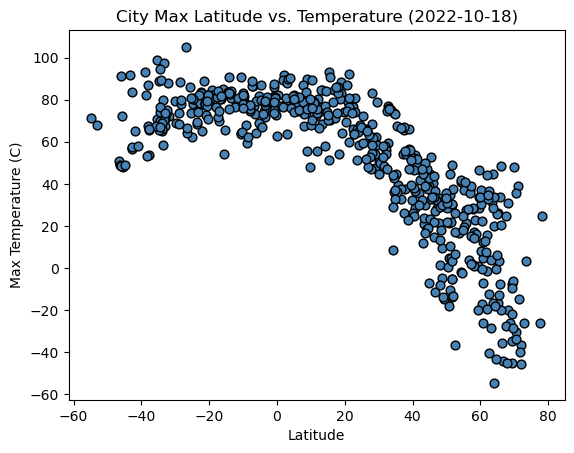

In [47]:
# Build scatter plot for latitude vs. temperature
# plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'],s=40, color="steelblue")
# plt.title('Tumor Volume vs Mouse Weight')
# plt.xlabel('Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],s=40, facecolors="steelblue",edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../Output_Data/Fig1_LatvTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

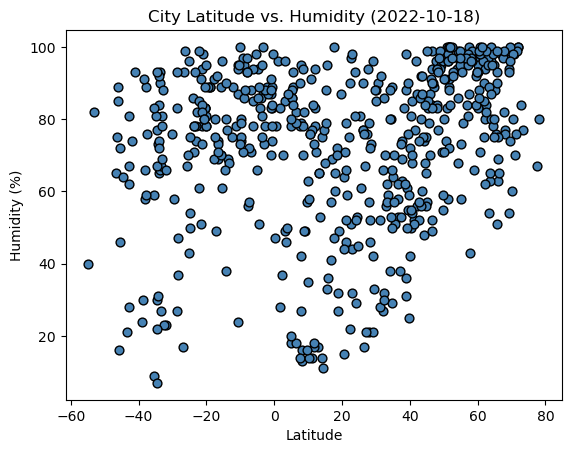

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],s=40, facecolors="steelblue",edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../Output_Data/Fig2_LatvHum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

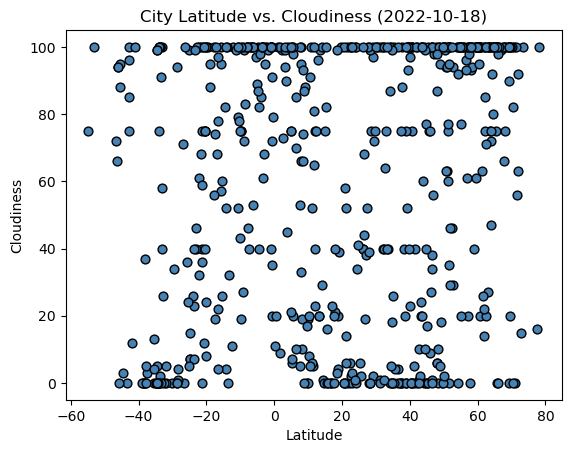

In [99]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],s=40, facecolors="steelblue",edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../Output_Data/Fig3_LatvCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

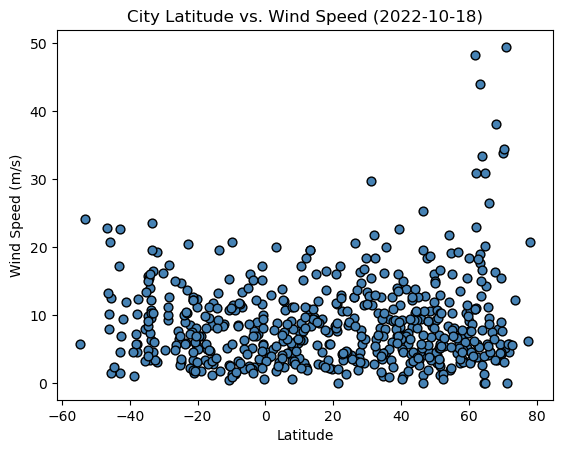

In [54]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],s=40, facecolors="steelblue",edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../Output_Data/Fig4_LatvWind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [79]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Tarko-sale,64.9225,77.7850,3.90,95,100,20.09,RU,1675886470
3,Ostrovnoy,68.0531,39.5131,30.96,77,100,38.10,RU,1675886476
7,Kapaa,22.0752,-159.3190,77.32,75,0,17.27,US,1675886363
8,Awbari,26.5921,12.7805,65.17,17,68,20.67,LY,1675886392
9,Mana,5.6592,-53.7767,77.04,89,98,10.67,GF,1675886499


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Port elizabeth,-33.9180,25.5701,69.31,84,0,3.44,ZA,1675886468
2,Airai,-8.9266,125.4092,59.45,95,99,1.25,TL,1675886472
4,Castro,-24.7911,-50.0119,80.96,50,7,3.11,BR,1675886482
5,Busselton,-33.6500,115.3333,58.44,90,2,10.80,AU,1675886486
6,Ushuaia,-54.8000,-68.3000,71.26,40,75,5.75,AR,1675886333


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7138304694517191


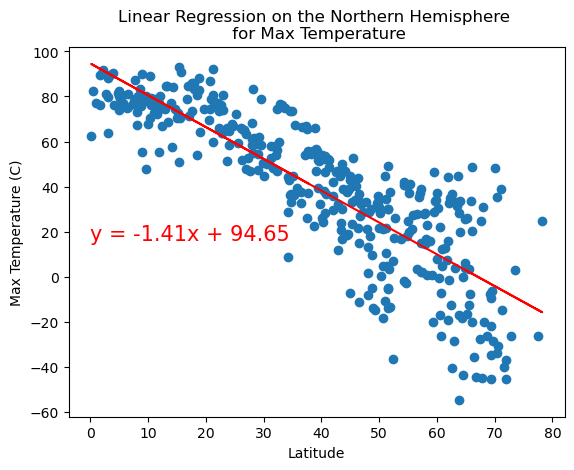

In [82]:
# Linear regression on Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for Max Temperature",
                       "Max Temperature (C)",(0,16))

The r-squared is: 0.10320507332919554


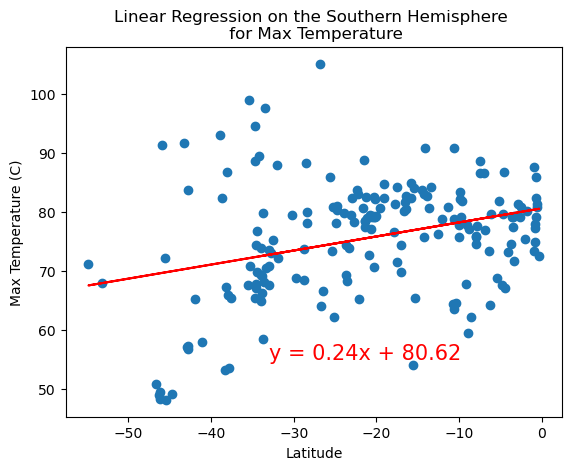

In [89]:
# Linear regression on Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for Max Temperature",
                       "Max Temperature (C)",(-33,55))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.20773739551575343


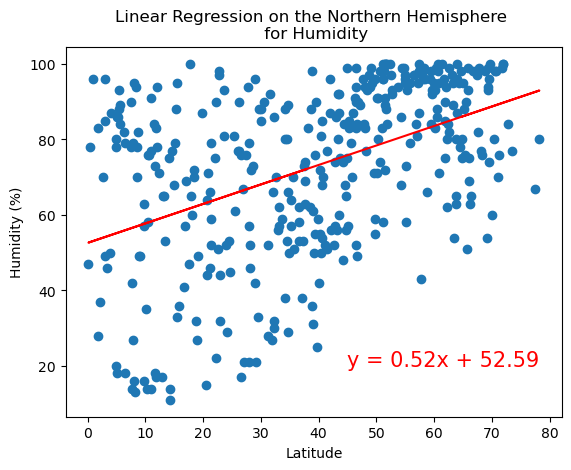

In [92]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for Humidity",
                       "Humidity (%)",(45,20))

The r-squared is: 0.15786639075697229


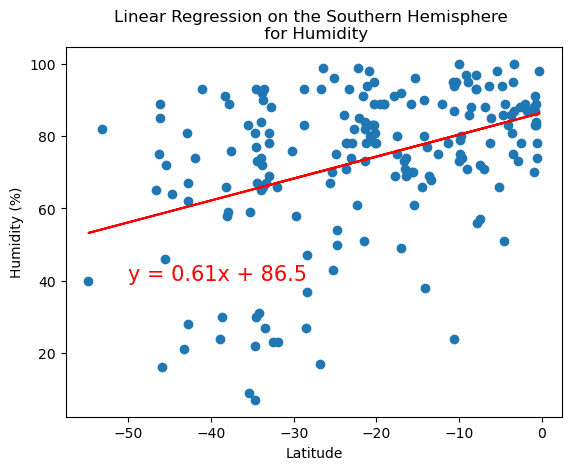

In [98]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for Humidity",
                       "Humidity (%)",(-50,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05953366147431155


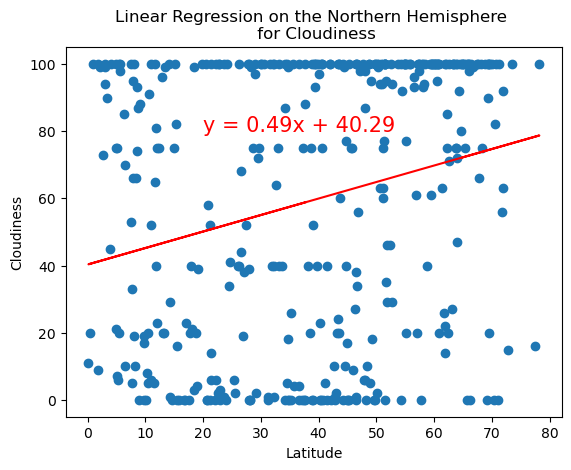

In [101]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Cloudiness",(20,80))

The r-squared is: 0.13695717439541222


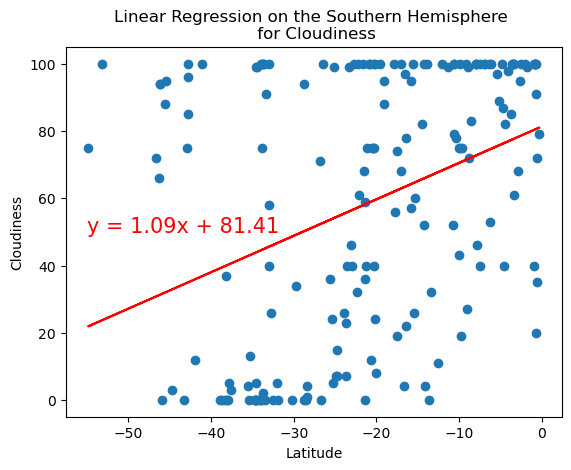

In [110]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for Cloudiness",
                       "Cloudiness",(-55,50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.027431754352233297


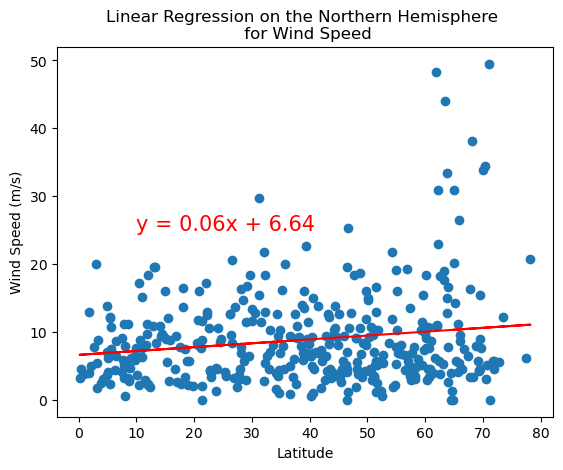

In [105]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed (m/s)",(10,25))

The r-squared is: 0.05751373024616022


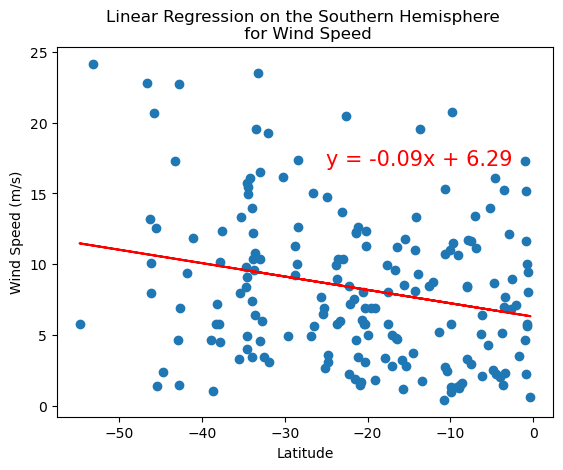

In [115]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Wind Speed (m/s)",(-25,17))

**Discussion about the linear relationship:** YOUR RESPONSE HERE